
K-Means & Other Clustering Algorithms: A Quick Intro with Python
    
https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/

In [35]:
#Getting Started with Clustering in Python
# import 
from sklearn import cluster

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score



In [41]:
#Dataset: available via networkx library (see code below)
data = pd.read_csv('xclara.csv')
print(data.shape)
print(data.columns)
print('V1 classes:',data['V1'].unique(), '\nV2 classes:', data['V2'].unique())

(3000, 2)
Index(['V1', 'V2'], dtype='object')
V1 classes: [ 2.072345 17.93671   1.083576 ... 64.46532  90.72282  64.87976 ] 
V2 classes: [ -3.241693  15.78481    7.319176 ... -10.50136  -12.25584  -24.87731 ]


(200, 2)

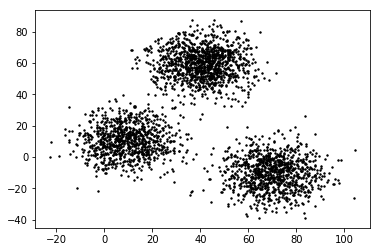

In [102]:
#visulasize data using scatter plot
f1 = data['V1'].values
f2 = data['V2'].values

plt.scatter(f1,f2,c='black', s=2)

data_short = data.loc[0:199,]
data_short.shape


Metrics & Plotting

Well, it is time to choose which algorithm is more suitable for our data. A simple visualization of the result might work on small datasets, but imagine a graph with one thousand, or even ten thousand, nodes. That would be slightly chaotic for the human eye. So, let calculate the Adjusted Rand Score (ARS) and the Normalized Mutual Information (NMI) metrics for easier interpretation.

Normalized Mutual Information (NMI)

Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means
a perfect match.

Adjusted Rand Score (ARS)

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters.

If that's a little weird to think about, have in mind that, for now, 0 is the lowest similarity and 1 is the highest.

In [155]:
# Cluster

# define number of clusters

model_kmeans = cluster.KMeans(n_clusters = 3)
model_agglomerative= cluster.AgglomerativeClustering(n_clusters = 3, linkage="ward") 
model_spectral = cluster.SpectralClustering(n_clusters = 3, n_init=200)
model_affinity = cluster.AffinityPropagation(damping =0.6)

# Fitting the inputs
result_kmeans = model_kmeans.fit(data)
result_agglomerative = model_agglomerative.fit(data)
result_spectral = model_spectral.fit(data_short)
result_affinity = model_affinity.fit(data_short)

In [156]:
#getting labels (array having assigned cluster values to each row point)
# labels using predict (only used for kmeans and affinity clustering)
label_kmeans2 = result_kmeans.predict(data)
label_affinity2 = result_affinity.predict(data_short)
label_affinity3 = result_affinity.predict(data)

label_kmeans = result_kmeans.labels_
label_kmeans3= model_kmeans.labels_
label_agglomerative = model_agglomerative.labels_
label_spectral = model_spectral.labels_
label_affinity = model_affinity.labels_

#NOTE: we can also use fit_predict() for fitting and predicting the labels for the models in one step

print('Kmeans labels:\n',label_kmeans2, label_kmeans2.shape)
print(label_kmeans3,label_kmeans3.shape)
print(label_kmeans,label_kmeans.shape)


print('\n\nAgglomerative labels:\n',label_agglomerative,label_agglomerative.shape)
print('\n\nSpectrall labels:\n',label_spectral, label_spectral.shape)
print('\n\nAffinity labels:',label_affinity, label_affinity.shape)
print(label_affinity2, label_affinity2.shape)
print(label_affinity3, label_affinity3.shape)

Kmeans labels:
 [0 0 0 ... 2 2 2] (3000,)
[0 0 0 ... 2 2 2] (3000,)
[0 0 0 ... 2 2 2] (3000,)


Agglomerative labels:
 [2 2 2 ... 1 1 1] (3000,)


Spectrall labels:
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 1 2 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1] (200,)


Affinity labels: [ 1  3  9 10 13  0 13  9 13  1 12  9  6  1 11 12  6  4 12  4  3 11 12  1
  9 12  7 10  4  0  6 11  1  2  5 10  3  9  5  3  4 10 11 10  5  6  9 13
  4  3  1 10 13  9  3 12 13  6  1  7  2  1  9  1  6 12 12  4 11  1  0  7
  4  9  9 10 10 10 10  4 10  6  3  3 12  4  0  6 13 13  2  3 11  3  9 12
  1  5 13  8  8 10 10 12  5  6  7 13  4 12  7  3  1  4  2  5  6  1 12  5
 12  8  4 10 11 10  3 10  8  6  1 11

In [160]:
#Centroid values
# they both don't  work
    #centroids_agglomerative = result_agglomerative.cluster_centers_
    #centroids_spectral = result_spectral.cluster_centers_
    
centroids_kmeans = result_kmeans.cluster_centers_
centroids_affinity = result_affinity.cluster_centers_


print('KMeans Centroids:\n', centroids_kmeans, '\nNumber of clusters',centroids_kmeans.shape[0])
print('\n\nAgglomerative result atributes:\nNumber of Leaves:',  result_agglomerative.n_leaves_, '\ncomponents:', result_agglomerative.n_components_)
print('\n\nSpectral Matrix:\n', result_spectral.affinity_matrix_)
print('\n\nAffintiy Centroids:\n', centroids_affinity, '\nNumber of clusters',centroids_affinity.shape[0])


KMeans Centroids:
 [[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]] 
Number of clusters 3


Agglomerative result atributes:
Number of Leaves: 3000 
components: 1


Spectral Matrix:
 [[1.00000000e+000 3.01719191e-267 1.37307313e-049 ... 9.72995634e-146
  6.30069508e-009 3.79843337e-039]
 [3.01719191e-267 1.00000000e+000 3.33877766e-155 ... 4.15207906e-170
  0.00000000e+000 5.87401845e-229]
 [1.37307313e-049 3.33877766e-155 1.00000000e+000 ... 1.94365195e-027
  1.23815373e-094 5.55069597e-008]
 ...
 [9.72995634e-146 4.15207906e-170 1.94365195e-027 ... 1.00000000e+000
  9.22646529e-214 1.78956516e-040]
 [6.30069508e-009 0.00000000e+000 1.23815373e-094 ... 9.22646529e-214
  1.00000000e+000 3.42265266e-072]
 [3.79843337e-039 5.87401845e-229 5.55069597e-008 ... 1.78956516e-040
  3.42265266e-072 1.00000000e+000]]


Affintiy Centroids:
 [[ 24.16993     32.02478   ]
 [  0.09228785  -6.651035  ]
 [ 28.50607     -9.091833  ]
 [ 18.65383     17.21672   ]
 [ -

In [ ]:
circle = plt.Circle((0.5,0.5),0.5, color='b', fill=False)

ax = plt.gca()

# change default range so that new circles will work
ax.set_xlim((-30, 130))
ax.set_ylim((-50, 100))

p1 = plt.scatter(f1, f2, c='g',s=4)
p2 = plt.scatter(column_1,column_2, c='black',s=200, marker='*')

c1 = plt.Circle((column_1[0], column_2[0]), 25, color='red' , linewidth= 2, fill=False)
c2 = plt.Circle((column_1[1], column_2[1]), 25, color='red' , linewidth= 2, fill=False)
c3 = plt.Circle((column_1[2], column_2[2]), 25, color='red' , linewidth= 2, fill=False)
ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)
ax.add_artist(p1)
ax.add_artist(p2)

ax.label_